# 911 Calls Data Analytics

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('ggplot')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [2]:
df=pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis of 911 calls

**1. Top 5 zipcodes for 911 calls**

**2. Top 5 townships for 911 calls**

**3. Number of unique title codes**



In [5]:
print('Top 5 zipcodes for 911 calss')
df['zip'].value_counts().head(5)

Top 5 zipcodes for 911 calss


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
print('Top 5 townships for 911 calls')
df['twp'].value_counts().head(5)

Top 5 townships for 911 calls


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
print('Number of unique title codes: ',df['title'].nunique())

Number of unique title codes:  110


## 911 Calls Reason Analysis

**1. Most Common Reason for 911 calls**

**2. Number of 911 calls of each reason based on time factors (Hour, Day of Week, Month)**

In [8]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

In [9]:
print('Number of 911 calls of each reason in total')
df['Reason'].value_counts()

Number of 911 calls of each reason in total


EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [10]:
# Create some time related features for further analysis
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['hour']=df['timeStamp'].dt.hour
df['month']=df['timeStamp'].dt.month
df['dayofweek']=df['timeStamp'].dt.dayofweek

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek']=df['dayofweek'].map(dmap)

**use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

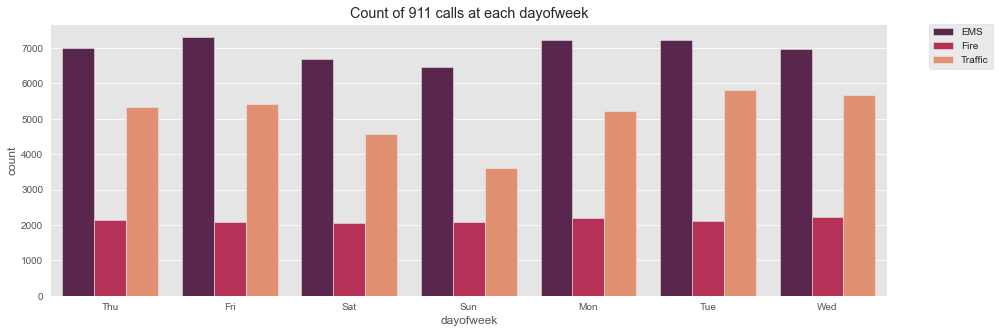

In [12]:
plt.figure(figsize=(15,5))
g=sns.countplot(x='dayofweek',data=df,hue='Reason',palette='rocket')
g.set(title='Count of 911 calls at each dayofweek')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

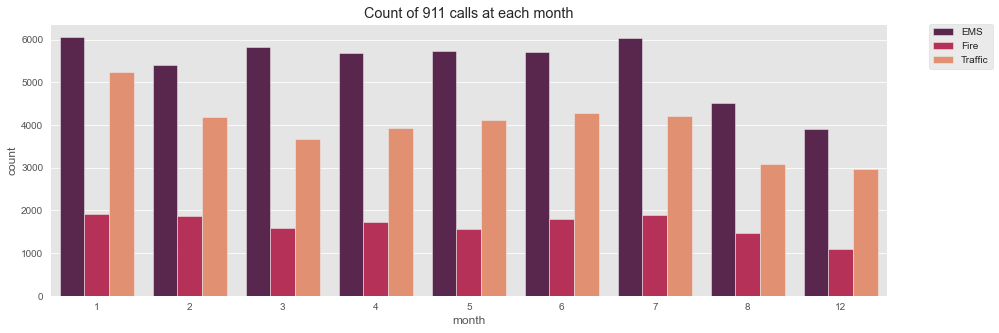

In [13]:
plt.figure(figsize=(15,5))
g=sns.countplot(x='month',data=df,hue='Reason',palette='rocket')
g.set(title='Count of 911 calls at each month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Count of calls per month')

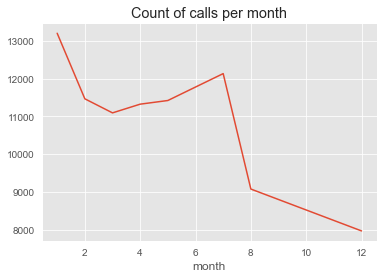

In [14]:
byMonth=df.groupby('month').count()
byMonth['twp'].plot()
plt.title('Count of calls per month')

**Use seaborn's lmplot() to create a linear fit on the number of calls per month.**

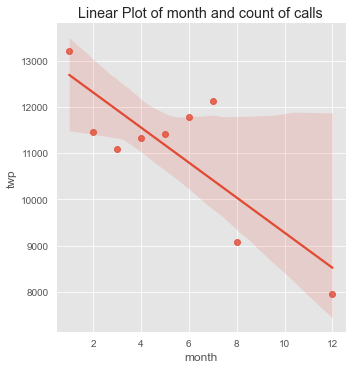

In [15]:
byMonth.reset_index(drop=False,inplace=True)
g=sns.lmplot(x='month',y='twp',data=byMonth,height=5)
g.set(title='Linear Plot of month and count of calls')

**create a interactive line plot of counts of 911 calls.**

<AxesSubplot:title={'center':'Counts of 911 calls each day'}, xlabel='Date'>

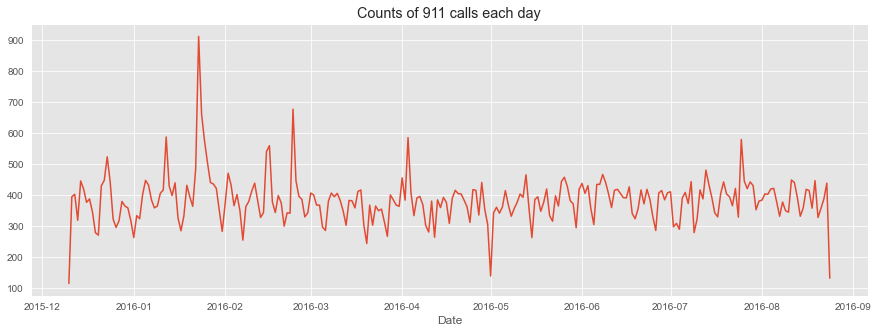

In [16]:
df['Date']=df['timeStamp'].dt.date
byDate=df.groupby('Date').count()['twp']
plt.figure(figsize=(15,5))
byDate.plot(title='Counts of 911 calls each day')

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

<AxesSubplot:title={'center':'Counts of 911 calls each day with reason: Traffic'}, xlabel='Date'>

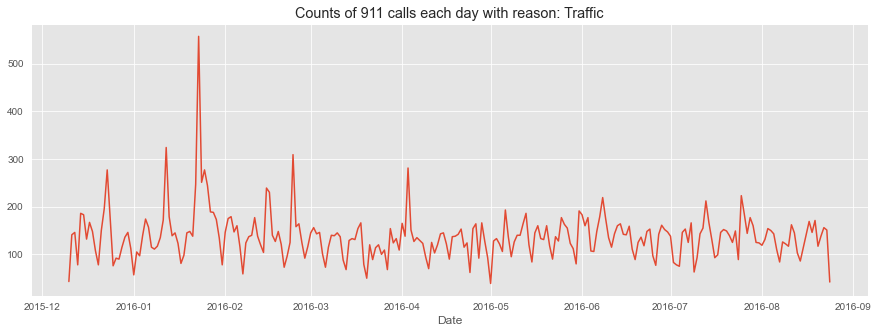

In [17]:
byDate_all=df.groupby(['Reason','Date']).count()
plt.figure(figsize=(15,5))
byDate_all.loc['Traffic']['twp'].plot(title='Counts of 911 calls each day with reason: Traffic')

<AxesSubplot:title={'center':'Counts of 911 calls each day with reason: Fire'}, xlabel='Date'>

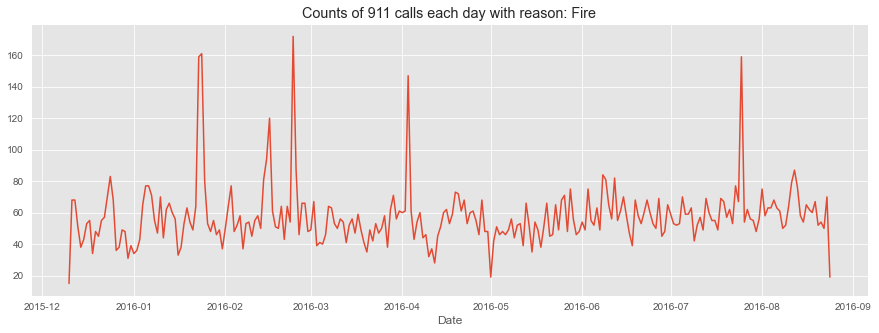

In [18]:
plt.figure(figsize=(15,5))
byDate_all.loc['Fire']['twp'].plot(title='Counts of 911 calls each day with reason: Fire')

<AxesSubplot:title={'center':'Counts of 911 calls each day with reason: EMS'}, xlabel='Date'>

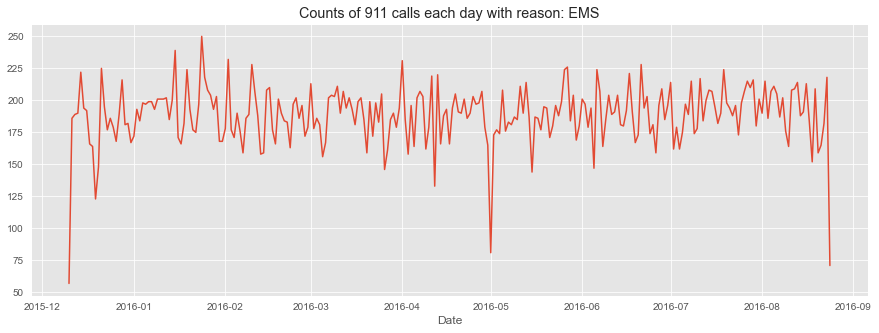

In [19]:
plt.figure(figsize=(15,5))
byDate_all.loc['EMS']['twp'].plot(title='Counts of 911 calls each day with reason: EMS')

**Create Pivot Table, the index is day of week and the column is Hour**

**Create heatmap and cluster map to see during which time there are relatively more 911 calls**

In [20]:
df['Hour']=df['timeStamp'].dt.hour
df_hour_dayofweek=df.pivot_table(values='twp',index=['dayofweek'],columns=['Hour'],aggfunc='count')

In [21]:
df_hour_dayofweek

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


<AxesSubplot:xlabel='Hour', ylabel='dayofweek'>

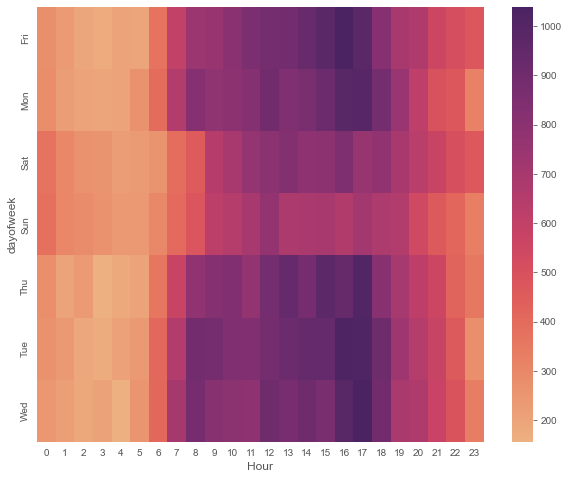

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hour_dayofweek,cmap='flare')

### Insights:

From the results we can see at weekdays (Monday to Friday), from 8am to 6pm, the number of calls are relatively larger

<Figure size 720x576 with 0 Axes>

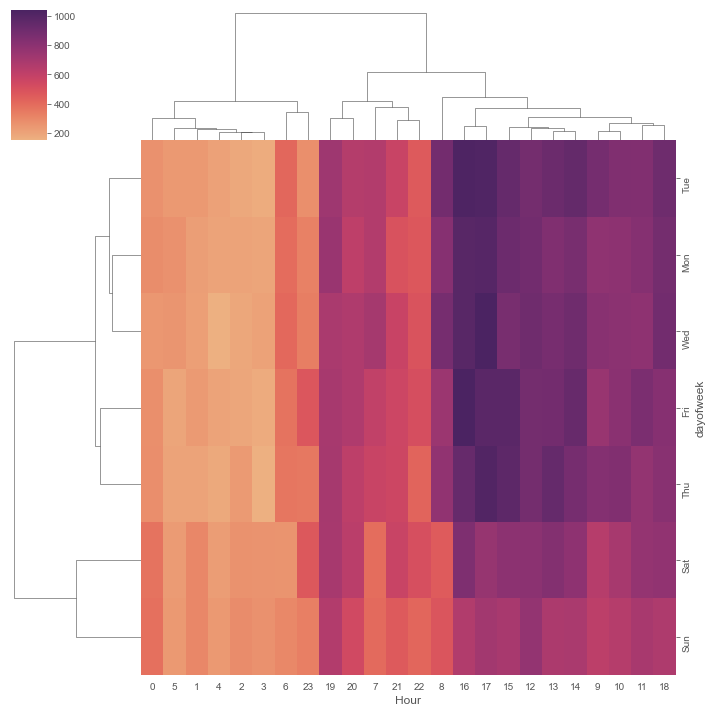

In [23]:
plt.figure(figsize=(10,8))
sns.clustermap(df_hour_dayofweek,cmap='flare')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [24]:
df_month_dayofweek=df.pivot_table(values='twp',index=['dayofweek'],columns=['month'],aggfunc='count')
df_month_dayofweek

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


<AxesSubplot:xlabel='month', ylabel='dayofweek'>

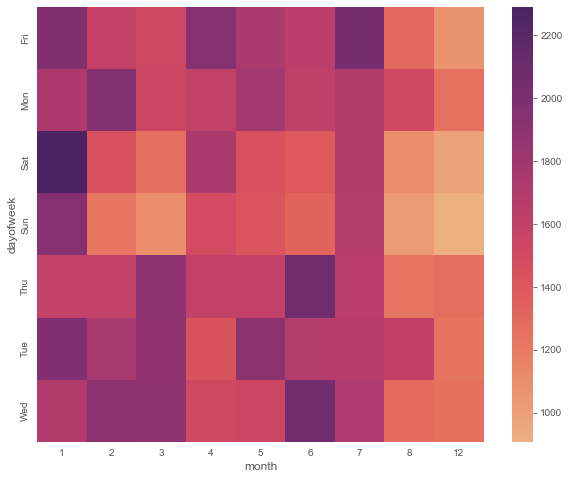

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df_month_dayofweek,cmap='flare')

<Figure size 720x576 with 0 Axes>

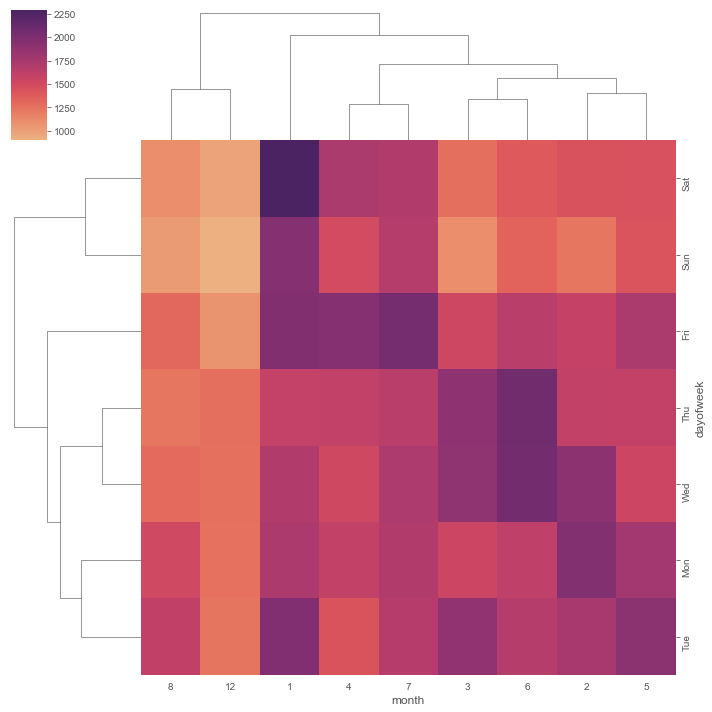

In [26]:
plt.figure(figsize=(10,8))
sns.clustermap(df_month_dayofweek,cmap='flare')